In [13]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

data = sio.loadmat('svm-linear-data.mat')

#cleaning up

X_col = data['X'][:,0]
n = X_col.size
A = np.reshape(X_col, (n,1))

X2_col = data['X'][:,1]
B = np.reshape(X2_col, (n,1))
y_col = dat1['y'][:,0]
C = np.reshape(y_temp_d1, (n,1))

data_clean = np.concatenate((A,B,C),axis=1)
pd.DataFrame(data_clean).head()

,0,1,2
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


Accuracy: 0.75


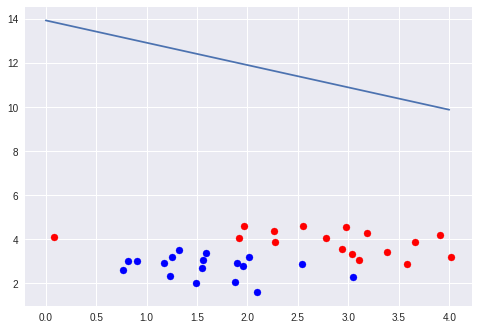

In [17]:
x_train, x_test, y_train, y_test = train_test_split(data_clean[:,0:2], 
                                                    data_clean[:,2], test_size=0.3,random_state=109) 

# splitting positive / negative samples

pos = y_train[:] == 1
neg = y_train[:] == 0

posX1 = x_train[pos][:,0]
posX2 = x_train[pos][:,1]

negX1 = x_train[neg][:,0]
negX2 = x_train[neg][:,1]

plt.scatter(posX1, posX2, color = 'r')
plt.scatter(negX1, negX2, color = 'b')

# support vector machine with low C

clf = svm.SVC(C=0.005, kernel='linear')
clf.fit(x_train, y_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# plot boundary

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx,yy)
y_pred = clf.predict(x_test)


Accuracy: 1.0


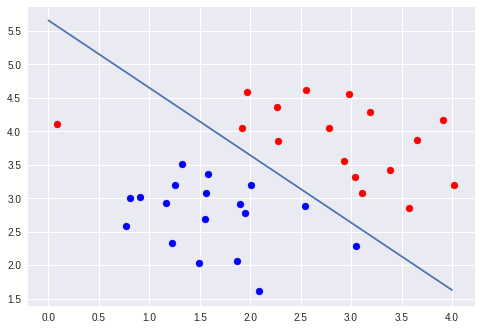

In [19]:
plt.scatter(posX1, posX2, color = 'r')
plt.scatter(negX1, negX2, color = 'b')

# support vector machine with higher C

clf = svm.SVC(C=0.05, kernel='linear')
clf.fit(x_train, y_train)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# plot boundary
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx,yy)
y_pred = clf.predict(x_test)